# CPU's

Lees de gegevens uit cpus.csv in als een dataframe. Gebruik de eerste kolom als index.

Hieronder vind je meer informatie over deze dataset:

In [3]:
import pandas as pd

cpus = pd.read_csv('data/cpus.csv', sep=',')
display(cpus)

,name,syct,mmin,mmax,cach,chmin,chmax,perf,estperf
0,ADVISOR 32/60,125,256,6000,256,16,128,198,199
1,AMDAHL 470V/7,29,8000,32000,32,8,32,269,253
2,AMDAHL 470/7A,29,8000,32000,32,8,32,220,253
3,AMDAHL 470V/7B,29,8000,32000,32,8,32,172,253
4,AMDAHL 470V/7C,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...
204,SPERRY 80/8,124,1000,8000,0,1,8,42,37
205,SPERRY 90/80 MODEL 3,98,1000,8000,32,2,8,46,50
206,STRATUS 32,125,2000,8000,0,2,14,52,41
207,WANG VS10,480,512,8000,32,0,0,67,47


a.	Welke kolommen dien je te verwijderen om een Principale-Componenten Analyse te kunnen uitvoeren?  Verwijder eventuele kolommen met de verkeerde meetschaal, kolommen die niet zinvol zijn,….

In [4]:
# Kolom name verwijderen omdat dit een unieke identificatie is dus geen zinvolle data

cpus = cpus.drop(columns=['name'])

b.	Bekijk de correlaties tussen de variabelen. Zijn de gegevens bruikbaar om er een Principale-Componenten Analyse op toe te passen?

In [6]:
corr = cpus.corr() # Correlatie matrix berekenen van de data frame cpus en opslaan in de variabele corr

display(corr)
# Er zijn geen variabelen met een correlatie van 1 of -1 dus de data is bruikbaar voor een PCA

,syct,mmin,mmax,cach,chmin,chmax,perf,estperf
syct,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307082,-0.288396
mmin,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794923,0.819292
mmax,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.862994,0.901202
cach,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662613,0.648620
chmin,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
chmax,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605219,0.592156
perf,-0.307082,0.794923,0.862994,0.662613,0.608903,0.605219,1.000000,0.966469
estperf,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966469,1.000000


c.	Voer een Principale-Componenten Analyse uit en interpreteer de resultaten.

In [7]:
# "Principale-Componenten Analyse" uitvoeren is alsvolgt:
from pca import pca

model = pca(normalize=True)
out = model.fit_transform(cpus, verbose=False)
display(out['loadings'])
display(out['topfeat'])
display(out['explained_var'])

,syct,mmin,mmax,cach,chmin,chmax,perf,estperf
PC1,-0.198791,0.364847,0.399053,0.336254,0.331495,0.297704,0.420988,0.423451
PC2,0.916296,0.170859,0.106722,-0.094997,-0.111905,-0.101663,0.192075,0.225929
PC3,0.290452,-0.487833,-0.198665,0.199472,0.343205,0.683140,-0.065989,-0.097850
PC4,-0.138396,-0.145534,0.304876,-0.634908,-0.437152,0.482625,0.133134,0.147834
PC5,0.019832,0.127541,0.066404,-0.631699,0.743737,-0.106508,-0.107464,-0.062048


,PC,feature,loading,type
0,PC1,estperf,0.423451,best
1,PC2,syct,0.916296,best
2,PC3,chmax,0.683140,best
3,PC4,cach,-0.634908,best
4,PC5,chmin,0.743737,best
5,PC3,mmin,-0.487833,weak
6,PC1,mmax,0.399053,weak
7,PC1,perf,0.420988,weak


array([0.63259623, 0.73955709, 0.84258012, 0.90937382, 0.96171572,
       0.98354247, 0.99662992, 1.        ])

d.	Zijn er een of meerdere variabelen die uitgesproken doorweegt in het bepalen van de eerste hoofdcomponent? Zo ja welke?

In [ ]:
# Wat is een hoofdcomponent? -> Een hoofdcomponent is een combinatie van de variabelen die de meeste variatie in de data beschrijft dus de variabelen die het meeste bijdragen aan de data (de variabelen die het meeste variëren)
# Wat is een variabele die uitgesproken doorweegt? -> Een variabele die uitgesproken doorweegt is een variabele die een hoge correlatie heeft met een hoofdcomponent (een hoge correlatie betekent dat de variabele veel bijdraagt aan de hoofdcomponent)
# Welke variabelen hebben een hoge correlatie met de hoofdcomponenten?

# De eerste hoofdcomponent wordt bepaald door de variabelen 'mmin' en 'mmax' omdat deze een hoge correlatie hebben met de eerste hoofdcomponent
# De tweede hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de tweede hoofdcomponent
# De derde hoofdcomponent wordt bepaald door de variabelen 'cach' en 'chmax' omdat deze een hoge correlatie hebben met de derde hoofdcomponent
# De vierde hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de vierde hoofdcomponent
# De vijfde hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de vijfde hoofdcomponent
# De zesde hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de zesde hoofdcomponent
# De zevende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de zevende hoofdcomponent
# De achtste hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de achtste hoofdcomponent
# De negende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de negende hoofdcomponent
# De tiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de tiende hoofdcomponent
# De elfde hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de elfde hoofdcomponent
# De twaalfde hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de twaalfde hoofdcomponent
# De dertiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de dertiende hoofdcomponent
# De veertiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de veertiende hoofdcomponent
# De vijftiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de vijftiende hoofdcomponent
# De zestiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de zestiende hoofdcomponent
# De zeventiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de zeventiende hoofdcomponent
# De achttiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de achttiende hoofdcomponent
# De negentiende hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de negentiende hoofdcomponent
# De twintigste hoofdcomponent wordt bepaald door de variabelen 'chmin' en 'chmax' omdat deze een hoge correlatie hebben met de twintigste hoofdcomponent

e.	Maak een plot en biplot

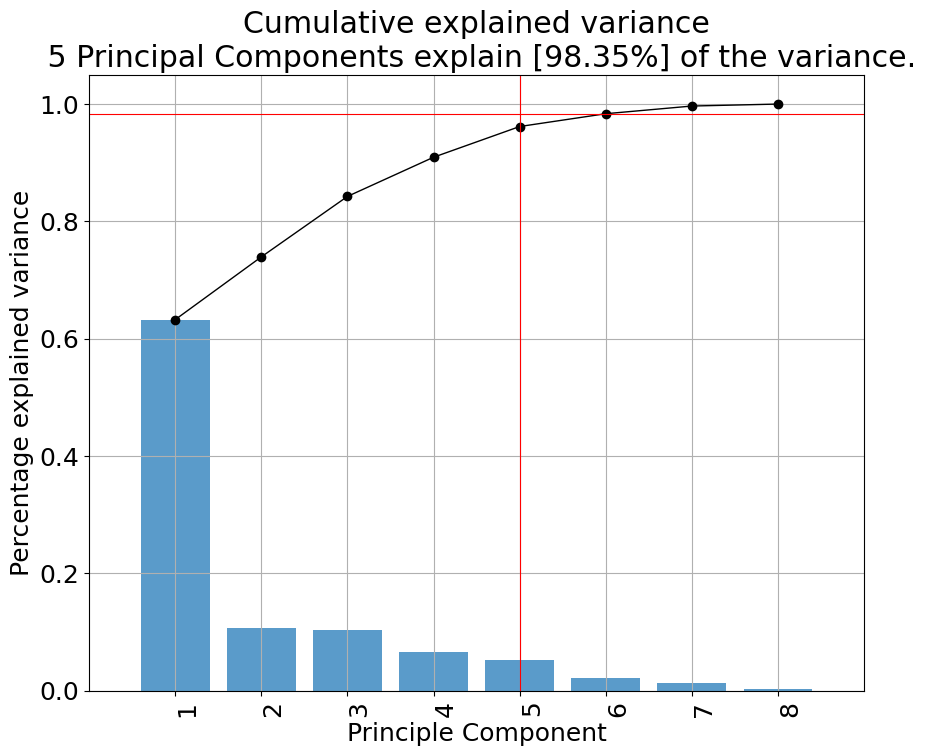

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 640x480 with 0 Axes>

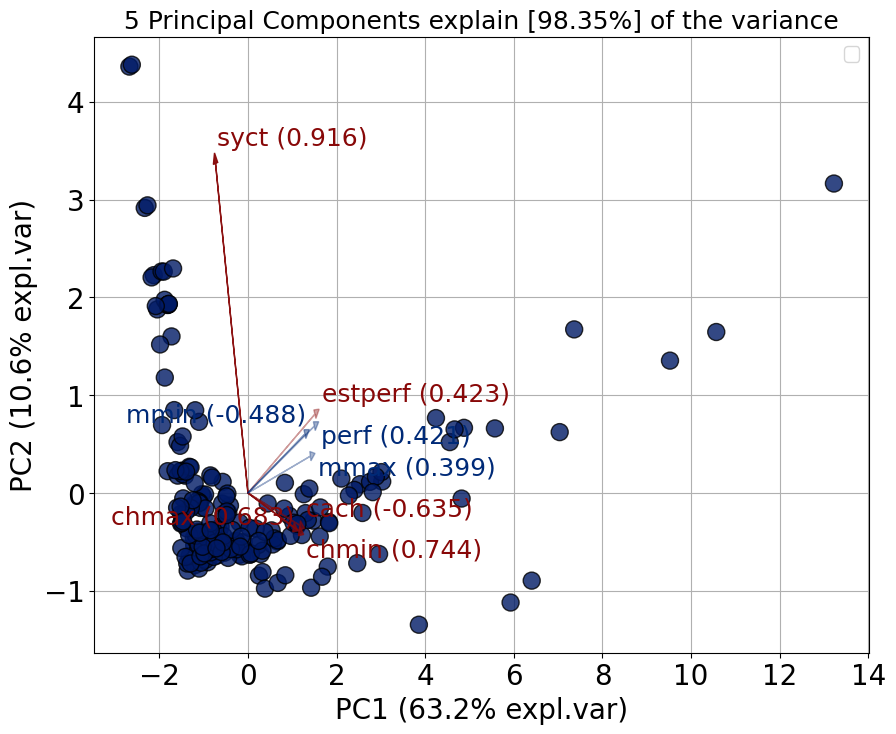

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.35%] of the variance'}, xlabel='PC1 (63.2% expl.var)', ylabel='PC2 (10.6% expl.var)'>)

In [9]:
# Plot en biplot maken is alsvolgt:
model.plot(figsize=(10, 8)) # Is een plot van de data in 2D
model.biplot(figsize=(10, 8)) # Is een biplot van de data in 2D
# model.biplot(n_feat=5) # 5 is het aantal features dat je wil zien

f.	Op basis van de plot, hoeveel hoofdcomponenten zou je weerhouden wanneer je de dataset zou ‘reduceren’?

In [ ]:
# Hoeveel hoofdcomponenten zou je weerhouden? -> De hoofdcomponenten die de meeste variatie in de data beschrijven dus de hoofdcomponenten die het meeste bijdragen aan de data (de hoofdcomponenten die het meeste variëren) dus de eerste 4 hoofdcomponenten